In [66]:
import numpy as np
import pandas as pd
from sklearn.cluster import KMeans
from sklearn import metrics
from sklearn.metrics import pairwise_distances, davies_bouldin_score
from sklearn.model_selection import train_test_split
from numpy import sqrt, array, random, argsort
from sklearn.preprocessing import scale
#from sklearn.datasets import load_boston
import matplotlib.pyplot as plt
from scipy.spatial.distance import cdist
import pickle


#from google.colab import drive
#drive.mount('/content/gdrive')

In [67]:
df =  pd.read_csv("https://raw.githubusercontent.com/AIML-Makgeolli/CpE-AIDL/main/thesis_database/Crop_recommendation.csv")
df_train = df.drop(['label','rainfall'], axis = 1)
df_train

,N,P,K,temperature,humidity,ph
0,90,42,43,20.879744,82.002744,6.502985
1,85,58,41,21.770462,80.319644,7.038096
2,60,55,44,23.004459,82.320763,7.840207
3,74,35,40,26.491096,80.158363,6.980401
4,78,42,42,20.130175,81.604873,7.628473
...,...,...,...,...,...,...
2195,107,34,32,26.774637,66.413269,6.780064
2196,99,15,27,27.417112,56.636362,6.086922
2197,118,33,30,24.131797,67.225123,6.362608
2198,117,32,34,26.272418,52.127394,6.758793


Declaration

In [68]:
X_N = df_train[['N']] #.iloc[:100]
X_P = df_train[['P']]
X_K = df_train[['K']]
X_temp = df_train[['temperature']]
X_moist = df_train[['humidity']]
y = df_train[['ph']] #.iloc[:100]


In [69]:
class kMeans():
  def __init__(self):
    return
    
  def input_train(self, X_in, y_in):
    self.X = X_in
    self.y = y_in
    X_train, X_test, y_train, y_test = train_test_split(self.X, self.y,test_size=0.3, random_state=42)
    self.data = pd.concat([X_train, y_train], axis=1).to_numpy()
    return self.data
  def kmeans_test(self,clust):
    self.km = KMeans(n_clusters = clust)
    self.clusters = self.km.fit_predict(self.data)
    self.clust_data = plt.scatter(*zip(*self.data),c=self.clusters)
    
    self.labels = self.km.labels_
    
    print(self.labels)
    print("Calinski-Harabasz Index: %0.3f" % metrics.calinski_harabasz_score(self.data, self.labels))
    print("Davies-Bouldin Index: %0.3f" % metrics.davies_bouldin_score(self.data, self.labels))
    print("Silhouette Coefficient: %0.3f" % metrics.silhouette_score(self.data, self.labels))
    
    
    return self.clust_data
  
  def outlier(self,threshold):
    self.centroids = self.km.cluster_centers_
    self.points = np.empty((0,len(self.data[0])), float)
    self.distances = np.empty((0,len(self.data[0])), float)
    for i, center_elem in enumerate(self.centroids):
      self.distances = np.append(self.distances, cdist([center_elem],self.data[self.clusters == i], 'euclidean')) 
      self.points = np.append(self.points, self.data[self.clusters == i], axis=0)
      
    percentile = threshold
    self.outliers = self.points[np.where(self.distances > np.percentile(self.distances, percentile))]
    outliers_df = pd.DataFrame(self.outliers,columns =['X','y'])
    return outliers_df

  def kmeans_results(self):
    fig = plt.figure()
    plt.scatter(*zip(*self.data),c=self.clusters)
    plt.scatter(*zip(*self.outliers),marker="o",facecolor="None",edgecolor="g",s=70); 
    plt.scatter(*zip(*self.centroids),marker="o",facecolor="b",edgecolor="b",s=20);

kmeanstest = kMeans()


Nitrogen and pH

In [70]:
kmeanstest.input_train(X_N,y)

array([[21.        ,  5.69958697],
       [29.        ,  6.96741777],
       [60.        ,  5.72257982],
       ...,
       [11.        ,  6.47544932],
       [11.        ,  6.36114111],
       [32.        ,  7.00703752]])

[1 1 2 ... 1 1 1]
Calinski-Harabasz Index: 6519.778
Davies-Bouldin Index: 0.532
Silhouette Coefficient: 0.623


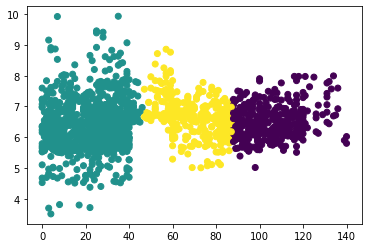

In [71]:
kmeanstest.kmeans_test(3) #no. of cluseter

In [72]:
kmeanstest.outlier(80)

,X,y
0,139.0,5.898293
1,134.0,6.691268
2,140.0,6.021440
3,89.0,5.631272
4,89.0,6.141329
...,...,...
303,52.0,8.380185
304,50.0,6.540821
305,87.0,6.759212
306,47.0,6.661871


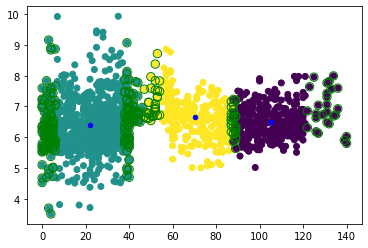

In [73]:
kmeanstest.kmeans_results()

Phosphorous and pH

In [74]:
kmeanstest.input_train(X_P,y)

array([[ 26.        ,   5.69958697],
       [ 35.        ,   6.96741777],
       [ 44.        ,   5.72257982],
       ...,
       [ 36.        ,   6.47544932],
       [124.        ,   6.36114111],
       [ 78.        ,   7.00703752]])

[2 2 0 ... 2 1 0]
Calinski-Harabasz Index: 6156.822
Davies-Bouldin Index: 0.412
Silhouette Coefficient: 0.640


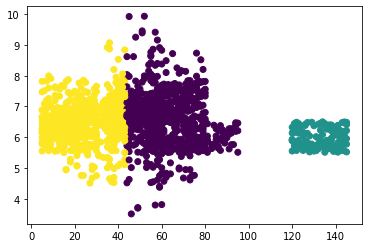

In [75]:
kmeanstest.kmeans_test(3)

In [76]:
kmeanstest.outlier(80)

,X,y
0,44.0,5.722580
1,45.0,5.952385
2,79.0,5.821650
3,79.0,7.806748
4,80.0,7.339321
...,...,...
303,40.0,7.063022
304,5.0,5.551963
305,5.0,6.152907
306,40.0,5.070176


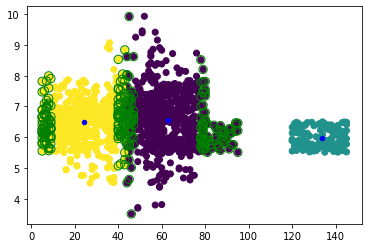

In [77]:
kmeanstest.kmeans_results()

Potassium and ph

In [78]:
kmeanstest.input_train(X_K,y)

array([[ 27.        ,   5.69958697],
       [ 28.        ,   6.96741777],
       [ 23.        ,   5.72257982],
       ...,
       [ 31.        ,   6.47544932],
       [204.        ,   6.36114111],
       [ 22.        ,   7.00703752]])

[1 1 1 ... 1 0 1]
Calinski-Harabasz Index: 24828.363
Davies-Bouldin Index: 0.349
Silhouette Coefficient: 0.678


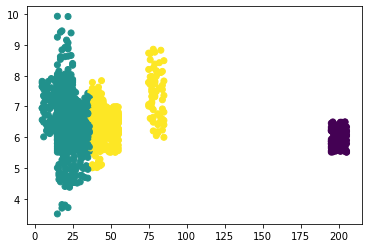

In [79]:
kmeanstest.kmeans_test(3)

In [80]:
kmeanstest.outlier(80)

,X,y
0,35.0,6.485761
1,6.0,7.335158
2,6.0,6.819827
3,33.0,6.095261
4,34.0,5.074273
...,...,...
303,77.0,7.485996
304,84.0,6.920251
305,39.0,7.165697
306,79.0,8.766129


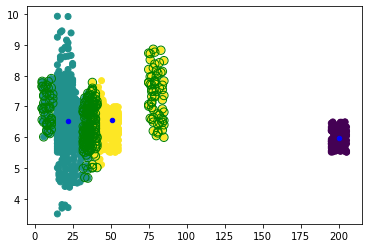

In [81]:
kmeanstest.kmeans_results()

Temperature and ph

In [82]:
kmeanstest.input_train(X_temp,y)

array([[27.00315545,  5.69958697],
       [28.3471611 ,  6.96741777],
       [24.7947077 ,  5.72257982],
       ...,
       [27.92063282,  6.47544932],
       [13.42988625,  6.36114111],
       [23.97081395,  7.00703752]])

[0 0 0 ... 0 2 0]
Calinski-Harabasz Index: 2197.802
Davies-Bouldin Index: 0.670
Silhouette Coefficient: 0.480


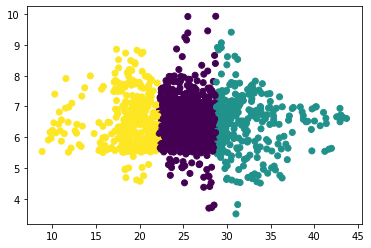

In [83]:
kmeanstest.kmeans_test(3)

In [84]:
kmeanstest.outlier(80)

,X,y
0,23.004459,7.840207
1,28.590524,6.094016
2,25.506346,9.926212
3,22.637142,6.233269
4,22.404235,7.199504
...,...,...
303,9.724458,6.158689
304,13.703192,7.609348
305,22.144641,6.400321
306,21.350934,7.871063


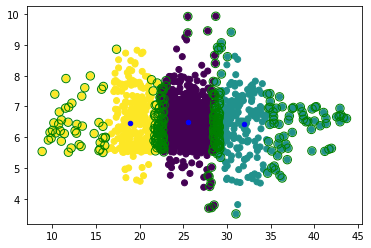

In [85]:
kmeanstest.kmeans_results()

Moisture and pH

In [86]:
kmeanstest.input_train(X_moist,y)

array([[47.67525434,  5.69958697],
       [53.53903102,  6.96741777],
       [70.04556743,  5.72257982],
       ...,
       [51.77965917,  6.47544932],
       [80.06633966,  6.36114111],
       [62.35557553,  7.00703752]])

[0 0 0 ... 0 1 0]
Calinski-Harabasz Index: 7493.968
Davies-Bouldin Index: 0.396
Silhouette Coefficient: 0.700


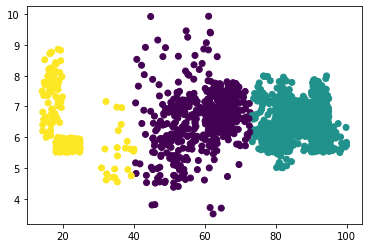

In [87]:
kmeanstest.kmeans_test(3)

In [88]:
kmeanstest.outlier(80)

,X,y
0,47.675254,5.699587
1,70.045567,5.722580
2,48.824639,5.952385
3,68.175431,6.559682
4,45.373376,5.517208
...,...,...
303,32.249142,7.161798
304,37.739929,5.642813
305,31.945506,5.617123
306,39.372526,4.747352


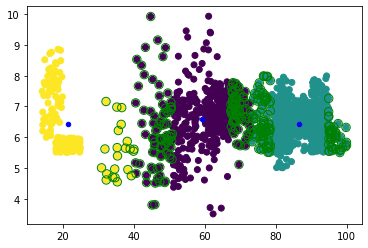

In [89]:
kmeanstest.kmeans_results()